<a href="https://www.kaggle.com/code/abenezertesfaye/facebook-live-sellers-in-thailand-with-k-means?scriptVersionId=219796337" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

**This project will contain the following contents.**


* **Exploratory Data Analysis (EDA)**: Perform various data analysis to understand our data. Take Data cleaning steps to prepare our data. Visualize our data to gain a deeper understanding and find relationships.

* **Splitting Data**: Divide the dataset into training and testing sets for unbiased evaluation of the model.

* **Preprocessing**: Handle missing values, encode categorical variables, and prepare data for clustering.

* **Feature Scaling**: Standardize features to ensure fair contribution to the clustering process.

* **Model Creation**:
    * **Training**: Apply the K-Means algorithm to find meaningful clusters.
    * **Elbow Method**: Determine the optimal number of clusters for the dataset.
    * **Prediction/Clustering**: Assign each data point to a cluster for further interpretation.
    * **Evaluation**: Assess cluster assignments, compare results with true labels, and analyze the performance of the model.


**> Please be sure to give comments and upvotes!!**

# Import Data

### Overview of the Data
Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers.

Research Paper: Nassim Dehouche and Apiradee Wongkitrungrueng. Facebook Live as a Direct Selling Channel, 2018, Proceedings of ANZMAC 2018: The 20th Conference of the Australian and New Zealand Marketing Academy. Adelaide (Australia), 3-5 December 2018.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #visuals
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')

# Exploratory Data Analysis

Let's have an overall feel for the data. In this crucial step we'll analyze and investigate the data to gain a understanding of our data. 

We'll alsp check the datast for null values, extreme values that might skew our data, and various other descritive characterstics of the data. 

Afterwards we'll clean the data and keep columns only necessary for our model.

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
print("Shape of the data frame is: ",df.shape) 

Shape of the data frame is:  (7050, 16)


In [5]:
# Check for null values.
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [6]:
print(type(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

*We've four columns that are complete null and contain no values. Thus, these columns will be of no use to us. We'll remove these columns.*

In [7]:
# Let's drop the 4 columns as they addd no value
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [8]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


We can also see that there's a huge gap in the min and max values. These differences can be very extreme. Which in return can really throw off the performance of our model.

Since outliers significanlty impact machine learning models by distorting parameter estimates and predictions, leading to reduced model accuracy and robustness. They can bias the model training process. 

Thus it's a very good practice to either remove, transform, and other techniques. For this particulary project we'll use MinMaxScaler to scaler the values between the values of 0 and 1.

In [9]:
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

Unique status types total:  4


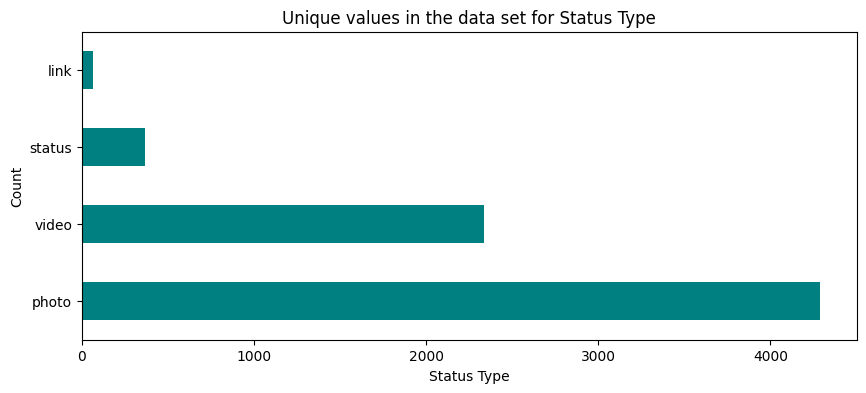

In [10]:
print("Unique status types total: ",df['status_type'].nunique())
df['status_type'].value_counts().plot(kind='barh',figsize=(10,4),color='teal')
plt.title('Unique values in the data set for Status Type')
plt.ylabel("Count",fontsize=10)
plt.xlabel("Status Type",fontsize=10);
#plt.grid(False);

In [11]:
df['status_published'].nunique()

6913

The status published column is really not necessary to the problem we are trying to solve. Since the ids are random and have no exact relationship to the target variable. Therefore, treating them as a feature variable will likely lead to outcomes we do not need, such as:
    
- **Overfitting Risk**
- **High Dimensionality**

> So, we'll have to remove them as well as the status_published column.


In [12]:
# These columns are also unnecessary to our dataset.
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [13]:
#Looking at the changes made
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


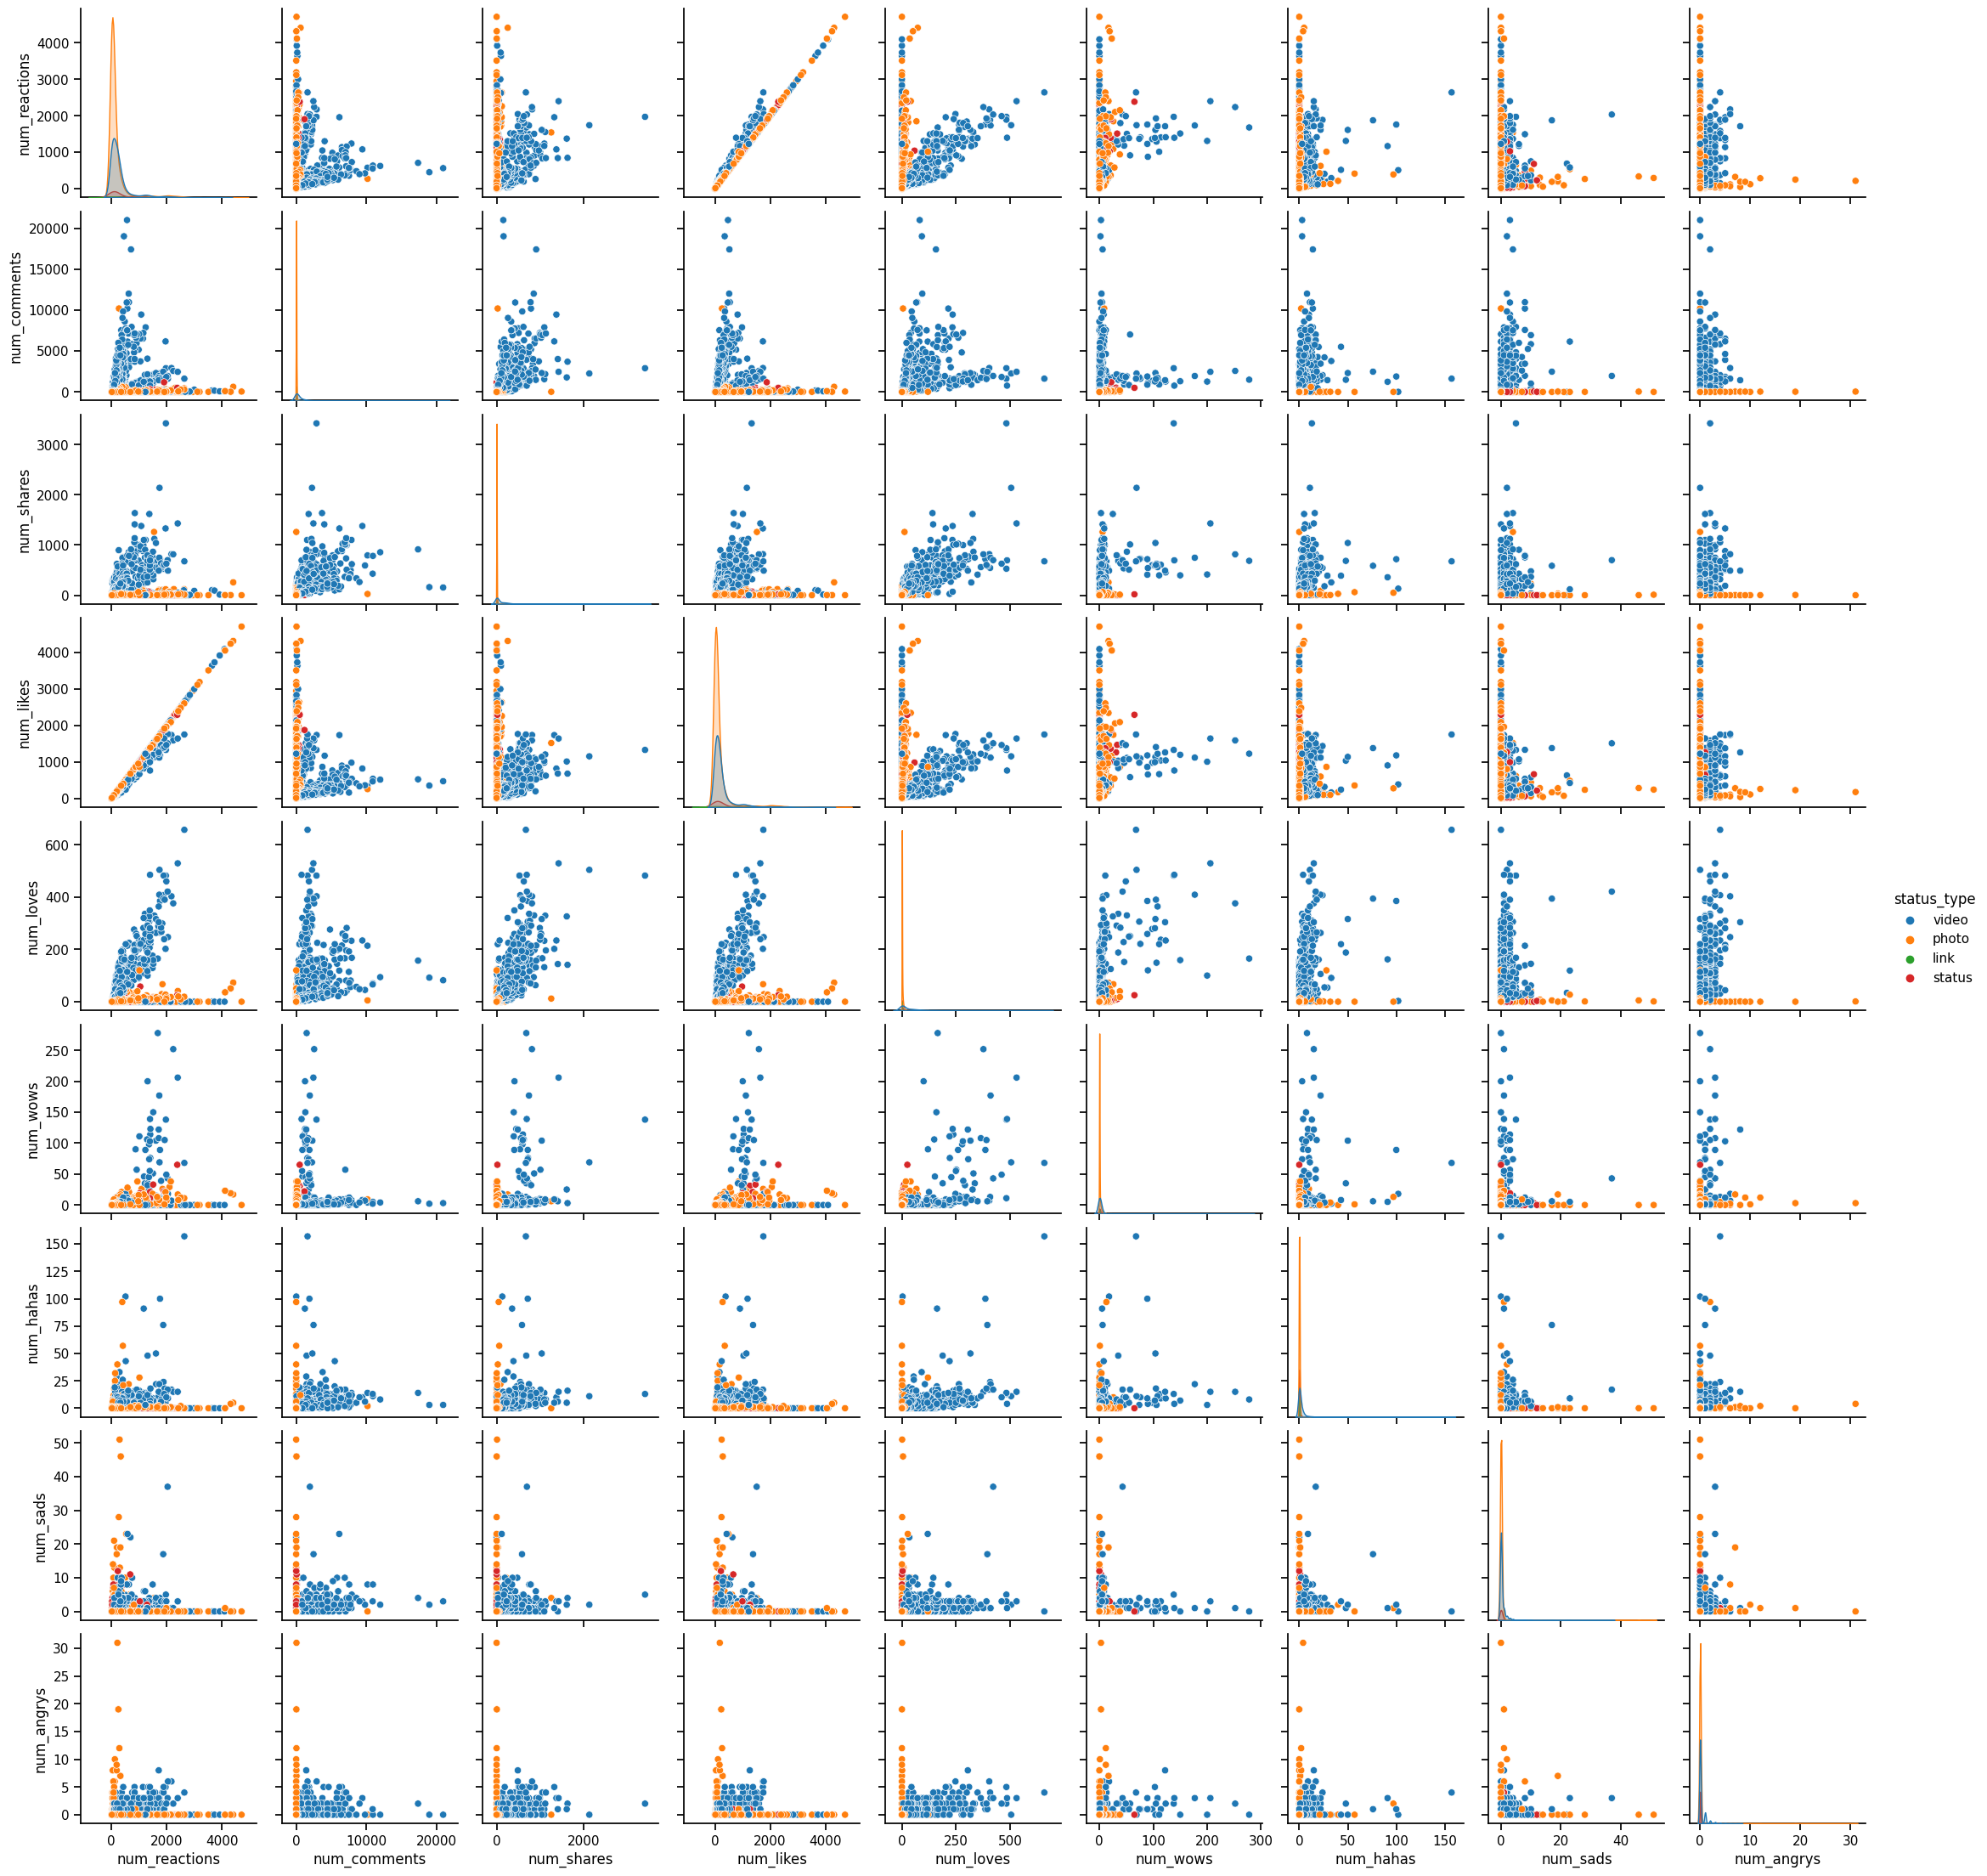

In [14]:
# Let's see the pairplot of the each variables relationshiop
sns.set_context('notebook')
sns.color_palette("viridis", as_cmap=True)
#sns.set_style('white')
sns.pairplot(df,hue='status_type');

In [15]:
print("No of Vale counts for Status Type column")
df['status_type'].value_counts()

No of Vale counts for Status Type column


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

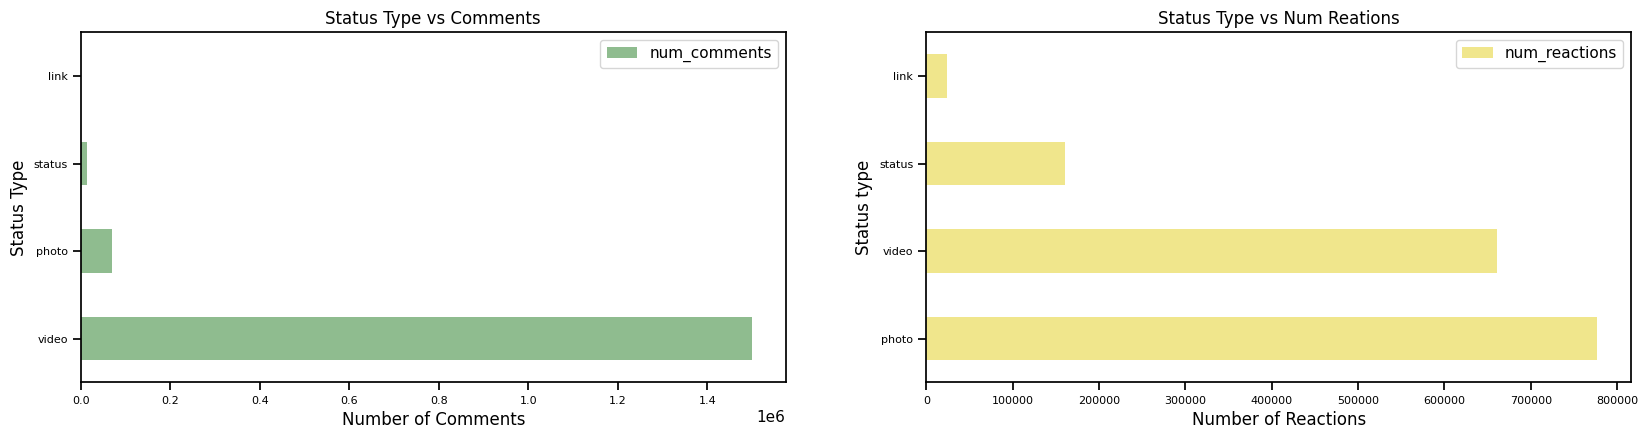

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
ax = df.groupby('status_type')['num_comments'].sum().sort_values(ascending = False).plot(kind='barh',color='darkseagreen')
ax.legend(loc='upper right')
ax.set(xlabel='Number of Comments', ylabel='Status Type',title="Status Type vs Comments")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False);

plt.subplot(2,2,2)
ax = df.groupby('status_type')['num_reactions'].sum().sort_values(ascending = False).plot(kind='barh',color='khaki')
ax.legend(loc='upper right')
ax.set(xlabel='Number of Reactions', ylabel='Status type', title='Status Type vs Num Reations')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False);

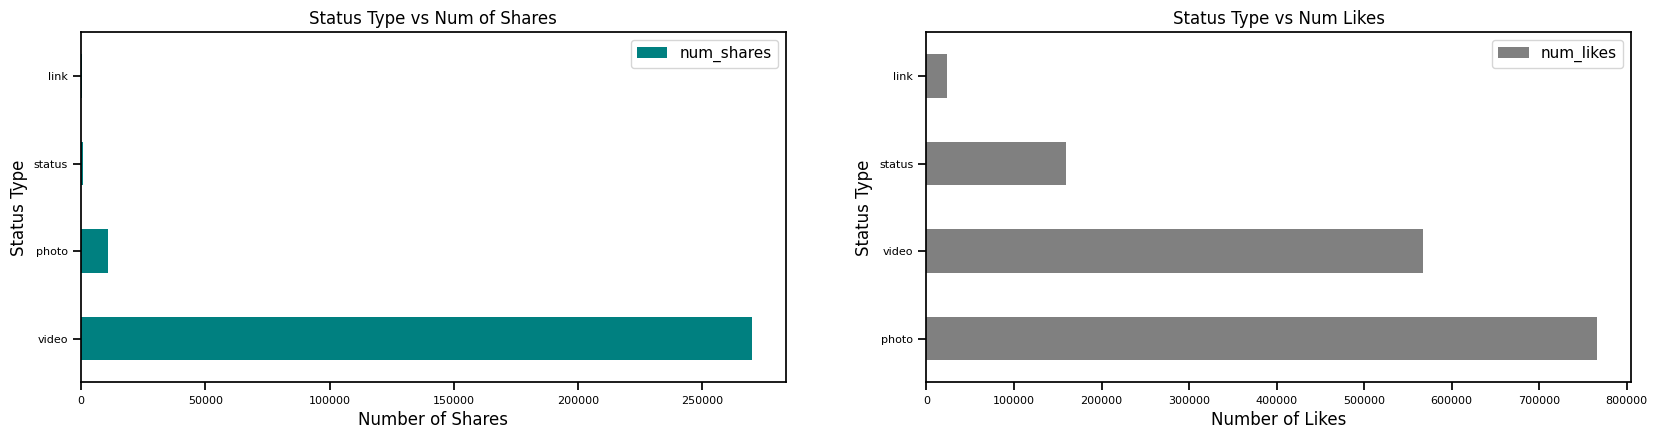

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
ax = df.groupby('status_type')['num_shares'].sum().sort_values(ascending = False).plot(kind='barh',color='teal')
ax.legend(loc='upper right')
ax.set(xlabel='Number of Shares', ylabel='Status Type', title='Status Type vs Num of Shares')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False);

plt.subplot(2,2,2)
ax = df.groupby('status_type')['num_likes'].sum().sort_values(ascending = False).plot(kind='barh',color='gray')
ax.legend(loc='upper right')
ax.set(xlabel='Number of Likes', ylabel='Status Type', title='Status Type vs Num Likes')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(False);

In [18]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [19]:

numeric_df = df.select_dtypes(include=['number']) #only select numerical values in teh dataframe
df_corr = numeric_df.corr() #pd.get_dummies(df.htype)
df_corr.head(10)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000


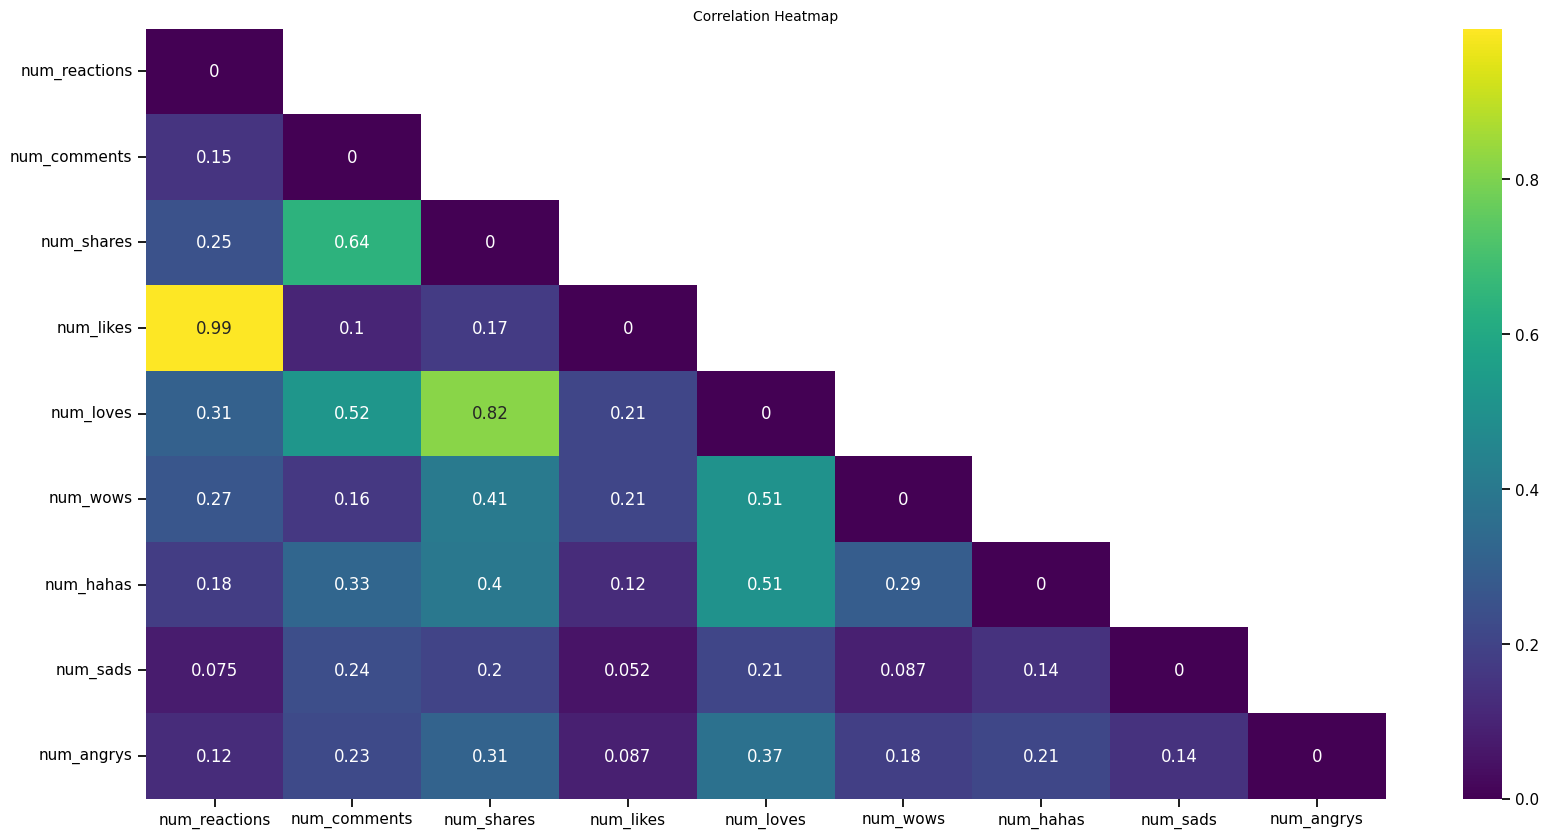

In [20]:
plt.figure(figsize=(20,10))
#Let's creaate a mask so as to not get the upper triagle of our heatmap for visual purpose.
mask = np.triu(np.ones(df_corr.shape),k=1)
np.fill_diagonal(df_corr.values, 0) # we set teh diagonal values to 0
sns.heatmap(data=df_corr,annot=True,cmap='viridis',mask=mask)
plt.title("Correlation Heatmap", fontsize=10)
plt.show()

- It's clear to see that content engament is high with videos and photos. As more comments, shares and likes are often for videos and photos.

- Also, as seen on the correlation more positively received videos are shared and drive more engament.

# Split Dataset

We can now declare the feature variables as well as the target variable.


* X - will be our feature variable
* y - will be our target variable


In [21]:
# X = df
X = df.drop('status_type',axis=1)
y = df['status_type']

In [22]:
#Let's get a look of our dataset
print(X.head(3))
print(y.head(3))

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0  
0    video
1    photo
2    video
Name: status_type, dtype: object


# Preprocessing 

In [23]:
# Let's convert the status type values into an integer.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# X['status_type'] = le.fit_transform(X['status_type'])
y = le.fit_transform(y)

In [24]:
pd.DataFrame(X).head(3)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0


In [25]:
pd.DataFrame(y).head(3)

,0
0,3
1,1
2,3


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


# Feature Scaling

As observed the values in dataframe have an extreme difference in the min and max values. This can be resolved using serveral scaling techniques. For this specific project we'll use ***MinMaxScaler***. 

This will linearily scale it down into a fixed range, where the largest occuring datapoint corresponds to the maximum value and the smallest one corresponds to the minimum value. Basically the dataset will be transformed in to a range from 0 to 1.

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [28]:
# Let's look at the changes made
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,0.048857,0.010689,0.011689,0.045657,0.019374,0.004638,0.004436,0.004778,0.003651
std,0.098222,0.042384,0.038435,0.095429,0.060842,0.031366,0.025205,0.031317,0.023446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003609,0.000000,0.000000,0.003609,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012633,0.000191,0.000000,0.012314,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.046497,0.001096,0.001168,0.039225,0.004566,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All of the values no range between 0 to 1. Which means we've converted all of them to one and zero.

# Create Model

Now let's create a class for our model. Then we'll fit our now scaled data to train it.

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state=42, n_init=1)
kmeans.fit(X_scaled)

KMeans(n_clusters=2, n_init=1, random_state=42)

## K-Means Cluster

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

The k-means algorithm divides a set of N samples X into K disjoint clusters C, each described by the mean j of the samples in the cluster. The means are commonly called the cluster centroids.

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum of squared criterion.

### **Inertia**


- **Inertia** is not a normalized metric. 

- The lower values of inertia are better and zero is optimal. 

- But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of `curse of dimensionality`). 

- Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

- We can will look at the models inertia in the following lines:-

In [30]:
kmeans.cluster_centers_

array([[0.02483047, 0.00932759, 0.00889636, 0.02254048, 0.01423501,
        0.00215728, 0.00331136, 0.00441161, 0.00279261],
       [0.35566655, 0.02806954, 0.04734731, 0.34084022, 0.08499512,
        0.03631548, 0.01879727, 0.00945925, 0.01461694]])

In [31]:
kmeans.inertia_

99.50082638379908

In [32]:
labels = kmeans.labels_
labels_correct = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (labels_correct, y.size))

Result: 275 out of 7050 samples were correctly labeled.


So the labels results tells us two things:
    
1. **Either our mdoel is not accurately labeling the values or**
2. **The labels of our model is different from the labels we've encoded.**

We'll further explore this issue in the next sections.

Let's look at the **Silhoutte Coefficient**. The silhoutte coefficient measures a samples distance from its neighboring clusters. A value of 0 means that the sample is on or very close to the decision boundary between two neighboring clusters.

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
silhouette_avg

0.8125263296259583

So the value tells us the samples are far away from the neighboring clusters as possible.

We can improve this using a variety of methods for the purpose of this project we'll be using the famous **Elbow Method** to further decide the appropriate number of clusters.

The elbow method is a graphical technique used to find the optimal number of clusters (K) for a k-means clustering algorithm.

## Elbow Method

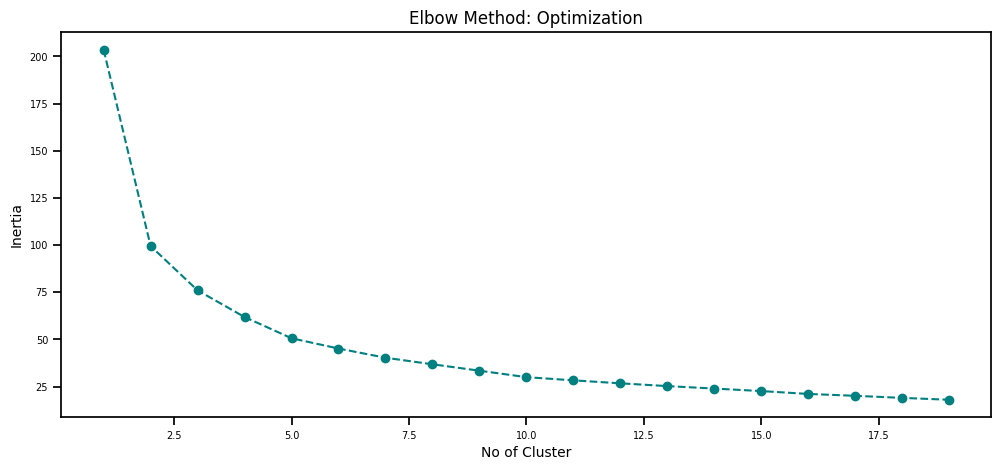

In [34]:
# Model Optimization
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    #K-means++ speeds up convergence by spreading out the initial centroids as far as possible from one another.
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.plot(range(1,20), inertia, marker='o',linestyle='--', color='teal') 
plt.xlabel("No of Cluster",fontsize=10)
plt.ylabel("Inertia",fontsize=10)
plt.title("Elbow Method: Optimization")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.grid(False)
plt.show()

## Best Score

Let's select the best performance of the model basing on the fact of it's accurate classification of the clusters.

In [35]:
def evaluate_kmeans_accuracy(X_scaled, y, max_clusters=6):
    best_accuracy = 0
    best_n_clusters = 0
    
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        
        #calculate accuracy
        correct_labels = sum(y == labels)
        accuracy = correct_labels / float(y.size)
        
        #results for cluster value
        print("For n_clusters = %d:" % n_clusters)
        print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
        print("Accuracy score: {0:0.2f}\n".format(accuracy))
        
        #pick the best performer
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_clusters = n_clusters

    #best performer is
    print("The best performer is n_clusters = %d with an accuracy of {0:0.2f}".format(best_accuracy) % best_n_clusters)


In [36]:
evaluate_kmeans_accuracy(X_scaled, y, max_clusters=7)

For n_clusters = 1:
Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01

For n_clusters = 2:
Result: 275 out of 7050 samples were correctly labeled.
Accuracy score: 0.04

For n_clusters = 3:
Result: 118 out of 7050 samples were correctly labeled.
Accuracy score: 0.02

For n_clusters = 4:
Result: 511 out of 7050 samples were correctly labeled.
Accuracy score: 0.07

For n_clusters = 5:
Result: 295 out of 7050 samples were correctly labeled.
Accuracy score: 0.04

For n_clusters = 6:
Result: 277 out of 7050 samples were correctly labeled.
Accuracy score: 0.04

For n_clusters = 7:
Result: 682 out of 7050 samples were correctly labeled.
Accuracy score: 0.10

The best performer is n_clusters = 7 with an accuracy of 0.10



- *KMeans cluster labels can differ from ground truth labels even if clustering is perfect, the "**accuracy**" here depends on how the clusters align with the true labels as discussed earlier. So, looking at the accuracy scores, since they're extremely low it would suggest that there is an issue with the labels. Which we'll need to address.*


- Please also note that Kmeans might generate more extra clusters, sub groups of a cluster. In this case the model might be providing valuable insights that we can use for analytical purpose. By splitting "photo" or "video" into multiple clusters, KMeans could be uncovering meaningful subgroups within our data.



### Evaluate Homogeneity

Let's also look at how homogenious the value in our clusters are for our model. 

**Homogeneity:** homogeneity measures how much the sample in a cluster are similar. It is defined using the Shannon's entropy.

**Homogeneity Score:** measures the extent to which each cluster contains only data points that belong to a single class or category.

In [37]:
from sklearn.metrics import homogeneity_score

#Let's define o|ur function evaluate_kmeans
def evaluate_kmeans(X_scaled, y, max_clusters=6):
    best_score = 0
    best_k = 0
    results = {}

    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        #Let's Get cluster labels
        labels = kmeans.labels_

        #We can now evaluate clustering performance using homogeneity_score
        #Please note that homogeneity score handles cluster-label alignment automatically
        score = homogeneity_score(y, labels)
        
        #Save teh results
        results[n_clusters] = score
        
        #check the best score
        if score > best_score:
            best_score = score
            best_k = n_clusters
        
        #Print the current results
        print(f"Clusters: {n_clusters} - Homogeneity Score: {score:.2f}")
    
    #prrint the best result
    print("\nBest Performer:")
    print(f"Number of clusters: {best_k} - Best Homogeneity Score: {best_score:.2f}")


In [38]:
#Now let's use our function to get the most homenenious cluster
evaluate_kmeans(X_scaled, y, max_clusters=7)

Clusters: 1 - Homogeneity Score: 0.00
Clusters: 2 - Homogeneity Score: 0.01
Clusters: 3 - Homogeneity Score: 0.04
Clusters: 4 - Homogeneity Score: 0.11
Clusters: 5 - Homogeneity Score: 0.14
Clusters: 6 - Homogeneity Score: 0.15
Clusters: 7 - Homogeneity Score: 0.17

Best Performer:
Number of clusters: 7 - Best Homogeneity Score: 0.17


In [39]:
print("Unique true labels:", len(np.unique(y)))
print("Unique clusters assigned by KMeans:", len(np.unique(kmeans.labels_)))

Unique true labels: 4
Unique clusters assigned by KMeans: 19


### Reconcile Labelling

We can now treat the labeling issue for our clusters as there is a mismatch with our models cluster value assigned with the value of of encoded value. 

- We first check how many unique clusters our cluster has assigned. 
- Then we'll try map it to our predefined lables so we can measure the models performance. We'll try to assign the most likely label to each cluster based on a confusion matrix.
- Afterwarwds we reiterate our models perforance per each cluster with our new mapped labels.

In [40]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Encode the labels
print("Unique true labels:", len(np.unique(y_encoded)))


n_clusters = 4 #the best cluster as seen with the elbow method as well  
kmeans_lb = KMeans(n_clusters=n_clusters, init='k-means++',max_iter=300, n_init=10,random_state=42)
kmeans_lb.fit(X_scaled)

# Verify the clusters
print("Unique clusters assigned by KMeans:", len(np.unique(kmeans_lb.labels_)))

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_encoded, kmeans_lb.labels_)
print("Confusion Matrix Shape:", conf_matrix.shape)


cluster_mapping = {}
for cluster in range(conf_matrix.shape[1]):
    true_label = np.argmax(conf_matrix[:, cluster])
    cluster_mapping[cluster] = le.inverse_transform([true_label])[0]

# Print the cluster-to-label mapping
print("\nCluster-to-Label Mapping:")
for cluster, label in cluster_mapping.items():
    print(f"Cluster {cluster} -> {label}")

# Relabel the clusters to match the ground truth
relabelled_clusters = np.vectorize(cluster_mapping.get)(kmeans_lb.labels_)

# Check accuracy
correct_labels = sum(y == relabelled_clusters)
accuracy = correct_labels / y.size

print("\nCorrectly matched labels: ", correct_labels)
print("Accuracy: {:.2f}".format(accuracy))


Unique true labels: 4
Unique clusters assigned by KMeans: 4
Confusion Matrix Shape: (4, 4)

Cluster-to-Label Mapping:
Cluster 0 -> 1
Cluster 1 -> 3
Cluster 2 -> 1
Cluster 3 -> 3

Correctly matched labels:  5001
Accuracy: 0.71


The model has assigned 

#### Let's check the models accuracy performance with the new mapped labels.

In [41]:
def evaluate_kmeans_accuracy(X_scaled, y, max_clusters=10):
    best_accuracy = 0
    best_n_clusters = 0
    
    for n_clusters in range(1, max_clusters + 1):
        # Initialize and fit KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_scaled)
        labels = kmeans.labels_
        
        #confusion matrix to find the best label mappings
        conf_matrix = confusion_matrix(y, labels)
        cluster_mapping = {}
        
        #mapping of clusters to their actual labell - 
        for cluster in range(conf_matrix.shape[1]):
            true_label = np.argmax(conf_matrix[:, cluster])
            cluster_mapping[cluster] = true_label
        
        #Let's now relabel clusters to match the true labels
        relabelled_clusters = np.vectorize(cluster_mapping.get)(labels)
        
        #we calculate the accuracy 
        correct_labels = sum(y == relabelled_clusters)
        accuracy = correct_labels / float(y.size)
        
        #cluster print
        print("For n_clusters = %d:" % n_clusters)
        print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
        print("Accuracy score: {0:0.2f}\n".format(accuracy))
        
        #pick the best accurate model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_clusters = n_clusters

    # Print the best performer
    print("The best performer is n_clusters = %d with an accuracy of {0:0.2f}".format(best_accuracy) % best_n_clusters)


In [42]:
evaluate_kmeans_accuracy(X_scaled, y, max_clusters=5)

For n_clusters = 1:
Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61

For n_clusters = 2:
Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61

For n_clusters = 3:
Result: 4457 out of 7050 samples were correctly labeled.
Accuracy score: 0.63

For n_clusters = 4:
Result: 5001 out of 7050 samples were correctly labeled.
Accuracy score: 0.71

For n_clusters = 5:
Result: 4983 out of 7050 samples were correctly labeled.
Accuracy score: 0.71

The best performer is n_clusters = 4 with an accuracy of 0.71
